In [1]:
!pip install yfinance

  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached cffi-2.0.0-cp313-cp313-win_amd64.whl.metadata (2.6 kB)
  Using cached pycparser-2.23-py3-none-any.whl.metadata (993 bytes)
Using cached curl_cffi-0.13.0-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached cffi-2.0.0-cp313-cp313-win_amd64.whl (183 kB)
Using cached pycparser-2.23-py3-none-any.whl (118 kB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15703 sha256=411e8c1ef772bdeb4d6140c9d18b0b45f3ca11a5bb3bb8f70ea62ed1d9874cc7
  Stored in directory: c:\users\subhanuddin\appdata\local\pip\cache\wh


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.2.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached pygments-2.19.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   --------------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [7]:
ticker = "TSLA"
df = yf.download(ticker, start="2015-1-1", end="2026-1-12")
df = df[["Close"]]
df.head()

C:\Users\SUBHANUDDIN\AppData\Local\Temp\ipykernel_14472\493046122.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-1-1", end="2026-1-12")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,TSLA
Date,
2015-01-02,14.620667
2015-01-05,14.006000
2015-01-06,14.085333
2015-01-07,14.063333
2015-01-08,14.041333


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [10]:
def create_sequence(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i,0])
        y.append(data[i,0])
    return np.array(X), np.array(y)

In [17]:
X , y = create_sequence(scaled_data, 60)
X = X.reshape((X.shape[0],X.shape[1], 1))

In [18]:
# Reshape for LSTM [samples, timesteps, features]
print(X)

[[[0.01049895]
  [0.0092192 ]
  [0.00938437]
  ...
  [0.00648759]
  [0.00573667]
  [0.00650979]]

 [[0.0092192 ]
  [0.00938437]
  [0.00933857]
  ...
  [0.00573667]
  [0.00650979]
  [0.00625995]]

 [[0.00938437]
  [0.00933857]
  [0.00929276]
  ...
  [0.00650979]
  [0.00625995]
  [0.00609616]]

 ...

 [[0.8409542 ]
  [0.88761236]
  [0.87374607]
  ...
  [0.89213037]
  [0.9204459 ]
  [0.8814912 ]]

 [[0.88761236]
  [0.87374607]
  [0.88605084]
  ...
  [0.9204459 ]
  [0.8814912 ]
  [0.87826409]]

 [[0.87374607]
  [0.88605084]
  [0.8727259 ]
  ...
  [0.8814912 ]
  [0.87826409]
  [0.88740414]]]


In [19]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [20]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

C:\Users\SUBHANUDDIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test,y_test)
)

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0016 - val_loss: 0.0041
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0014 - val_loss: 0.0027
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0014 - val_loss: 0.0055
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 12/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0

In [22]:
predicted_prices = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [23]:
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

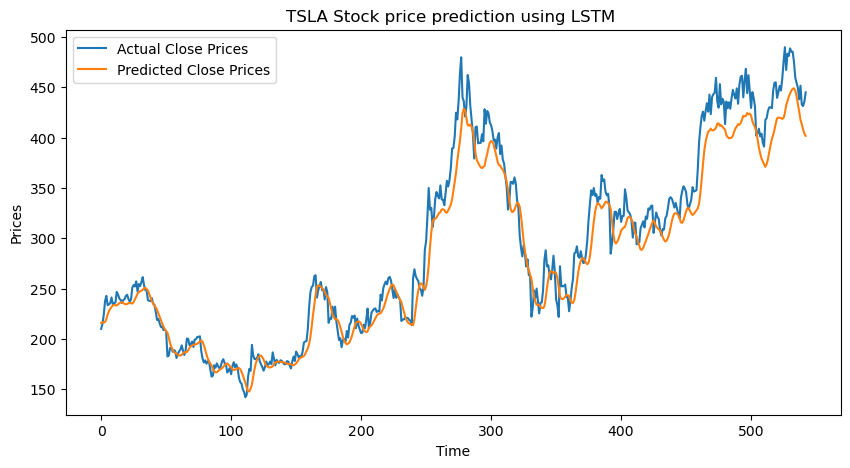

In [24]:
plt.figure(figsize=(10,5))
plt.plot(real_prices, label="Actual Close Prices")
plt.plot(predicted_prices, label="Predicted Close Prices")
plt.title(f"{ticker} Stock price prediction using LSTM ")
plt.xlabel("Time")
plt.ylabel("Prices")
plt.legend()
plt.show()

In [25]:
last_60_days = scaled_data[-60:]
last_60_days = last_60_days.reshape((1, 60, 1))

next_day_price = model.predict(last_60_days)
next_day_price = scaler.inverse_transform(next_day_price)

print(f"Predicted Next Day Closing Price for {ticker}: ${next_day_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Next Day Closing Price for TSLA: $402.90


In [26]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [27]:
model.save("lstm_stock_model.h5")